# Plots and analysis

## Imports

In [82]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit

pd.options.mode.chained_assignment = None  # Stop seeing warnings

In [83]:
df = pd.read_pickle("data/df")
df_sigmoid = pd.read_pickle("data/df_sigmoid")

In [84]:
def profile_participants(group, aq_mc):
    if group == "HA" and aq_mc:
        profile = "2e"

    elif group == "HA":
        profile = "HA"

    elif group == "Control" and aq_mc:
        profile = "H-AQ"

    elif group == "Control" and not aq_mc:
        profile = "TD"

    else:
        profile = None

    return profile


df["Profile"] = df.apply(
    lambda x: profile_participants(group=x["Group"], aq_mc=x["AQ_MC"]), axis=1
)
df

,Código de participante,Group,Sex,Age,EL,Occupation,Scholarship,Neurological_D,Conditions,Prob_Vision,...,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL,Profile
7,AC01,HA,Femenino,17.0,Universitario incompleto,Estudiante,NaN,No,No,No,...,10.0,10.0,10.0,15.0,20.0,60.833333,12.500000,15.000000,12.500000,HA
8,AC02,HA,Femenino,16.0,Universitario incompleto,Estudiante de ingeniería,NaN,No,No,Si,...,5.0,10.0,5.0,10.0,15.0,87.500000,9.166667,11.666667,9.166667,2e
9,AC03,HA,Femenino,17.0,Secundaria completa,Estudiante,NaN,No,No,No,...,10.0,5.0,5.0,5.0,5.0,94.166667,6.666667,7.500000,6.666667,HA
11,AC05,HA,Femenino,16.0,Universitario incompleto,Estudiante,NaN,No,No,No,...,5.0,0.0,5.0,5.0,5.0,93.333333,4.166667,5.000000,4.166667,2e
12,AC06,HA,Femenino,17.0,Universitario incompleto,estudiante,NaN,No,No,No,...,5.0,5.0,-5.0,0.0,-10.0,105.000000,0.000000,1.666667,0.000000,2e
14,AC08,HA,Masculino,18.0,Universitario incompleto,Estudiante,NaN,No,No,No,...,0.0,0.0,0.0,5.0,-10.0,75.833333,0.000000,2.500000,0.000000,HA
15,AC09,HA,Masculino,17.0,Secundaria completa,Estudiante,NaN,No,No,Si,...,15.0,10.0,5.0,5.0,5.0,98.750000,12.500000,8.333333,8.333333,HA
16,AC10,HA,Femenino,18.0,Secundaria completa,Estudiante,NaN,No,No,No,...,15.0,5.0,10.0,5.0,0.0,95.416667,13.333333,8.333333,8.333333,2e
17,AC11,HA,Masculino,17.0,Universitario incompleto,Estudiante,NaN,No,No,Si,...,10.0,5.0,10.0,15.0,-5.0,84.166667,7.500000,9.166667,7.500000,2e
20,AC14,HA,Femenino,17.0,Universitario incompleto,Estudiante,NaN,No,No,No,...,5.0,10.0,10.0,0.0,-10.0,105.833333,5.000000,3.333333,3.333333,2e


In [85]:
df.describe()

,Age,AQ_TOTAL,AQ_Attention_Detail,AQ_Attention_Switch,AQ_Communication,AQ_Imagination,AQ_Social,AQ_1,AQ_2,AQ_3,...,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,17.612903,4.741935,1.419355,1.064516,1.290323,0.709677,1.000000,0.709677,0.387097,0.709677,...,6.785714,6.785714,5.714286,4.285714,3.035714,1.964286,74.360119,6.041667,6.041667,4.761905
std,1.145351,1.692488,0.922829,0.727346,0.692510,0.642575,0.516398,0.461414,0.495138,0.461414,...,6.833237,6.696362,7.033555,4.852316,5.666550,8.315457,23.729681,5.627429,4.733782,5.085975
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-10.000000,36.666667,-2.500000,-0.833333,-2.500000
25%,17.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,-1.250000,54.166667,0.000000,1.666667,0.000000
50%,18.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,78.333333,5.833333,5.833333,4.583333
75%,18.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,6.250000,5.000000,5.000000,94.166667,10.833333,8.541667,8.333333
max,21.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,25.000000,25.000000,25.000000,15.000000,15.000000,20.000000,106.666667,17.500000,18.333333,18.333333


In [86]:
df.groupby(["Group", "Sex"]).count()

Código de participante  Age  EL  Occupation  Scholarship  \
Group   Sex                                                                   
Control Femenino                        7    7   7           7            7   
HA      Femenino                       18   18  18          18            7   
        Masculino                       6    6   6           6            1   

                   Neurological_D  Conditions  Prob_Vision  Prob_Aud  \
Group   Sex                                                            
Control Femenino                7           7            7         7   
HA      Femenino               18          18           18        18   
        Masculino               6           6            6         6   

                   Psiq_diag  ...  HL_500  HL_1000  HL_2000  HL_4000  HL_8000  \
Group   Sex                   ...                                               
Control Femenino           7  ...       7        7        7        7        7   
HA      Femenino          18  ...      16       16       16       16       16   
        Masculino          6  ...       5        5        5        5        5   

                   Avg_LDL  Avg_HL_L  Avg_HL_R  Avg_HL  Profile  
Group   Sex                                                      
Control Femenino         7         7         7       7        7  
HA      Femenino        16        16        16      16       18  
        Masculino        5         5         5       5        6  

[3 rows x 63 columns]

In [87]:
df.groupby(["Profile", "Sex"]).count()

Código de participante  Group  Age  EL  Occupation  \
Profile Sex                                                             
2e      Femenino                        8      8    8   8           8   
        Masculino                       2      2    2   2           2   
H-AQ    Femenino                        2      2    2   2           2   
HA      Femenino                       10     10   10  10          10   
        Masculino                       4      4    4   4           4   
TD      Femenino                        5      5    5   5           5   

                   Scholarship  Neurological_D  Conditions  Prob_Vision  \
Profile Sex                                                               
2e      Femenino             2               8           8            8   
        Masculino            1               2           2            2   
H-AQ    Femenino             2               2           2            2   
HA      Femenino             5              10          10           10   
        Masculino            0               4           4            4   
TD      Femenino             5               5           5            5   

                   Prob_Aud  ...  HL_250  HL_500  HL_1000  HL_2000  HL_4000  \
Profile Sex                  ...                                              
2e      Femenino          8  ...       7       7        7        7        7   
        Masculino         2  ...       1       1        1        1        1   
H-AQ    Femenino          2  ...       2       2        2        2        2   
HA      Femenino         10  ...       9       9        9        9        9   
        Masculino         4  ...       4       4        4        4        4   
TD      Femenino          5  ...       5       5        5        5        5   

                   HL_8000  Avg_LDL  Avg_HL_L  Avg_HL_R  Avg_HL  
Profile Sex                                                      
2e      Femenino         7        7         7         7       7  
        Masculino        1        1         1         1       1  
H-AQ    Femenino         2        2         2         2       2  
HA      Femenino         9        9         9         9       9  
        Masculino        4        4         4         4       4  
TD      Femenino         5        5         5         5       5  

[6 rows x 63 columns]

## Comparing means of LDL and HL between HA and control across frequencies
- T-test LDL per group per frequency
- LDL mean per group per frequency (pointplot)
- LDL mean per group per frequency (boxplot)
- T-test HL per group per frequency
- HL mean per group per frequency (pointplot)
- HL mean per group per frequency (boxplot)

### Preprocessing for this area

In [88]:
df = df[
    [
        "Código de participante",
        "Group",
        "TWI",
        "OPI",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
        "Avg_LDL",
        "Avg_HL_L",
        "Avg_HL_R",
        "Avg_HL",
        "AQ_TOTAL",
        "Profile",
    ]
]

Cannot run with NaN values, so I will drop them by now. However, in the oficial running, Nan participants should be eliminated by now and thus the following cell shouldnt run

In [89]:
df.dropna(inplace=True)
df.sample(10)

,Código de participante,Group,TWI,OPI,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,...,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL,AQ_TOTAL,Profile
38,AC32,HA,156.353259,0.540000,100.0,110.0,110.0,110.0,110.0,100.0,...,25.0,10.0,10.0,15.0,106.666667,17.500000,18.333333,18.333333,2.0,HA
7,AC01,HA,149.003664,0.466667,60.0,60.0,70.0,70.0,50.0,55.0,...,10.0,10.0,15.0,20.0,60.833333,12.500000,15.000000,12.500000,5.0,HA
23,AC17,HA,208.416911,0.606667,45.0,55.0,65.0,45.0,60.0,40.0,...,15.0,5.0,10.0,0.0,51.666667,9.166667,8.333333,8.333333,3.0,HA
12,AC06,HA,228.092147,0.473333,80.0,100.0,120.0,115.0,115.0,100.0,...,5.0,-5.0,0.0,-10.0,105.000000,0.000000,1.666667,0.000000,7.0,2e
49,AC43,HA,118.815054,0.193333,65.0,75.0,70.0,65.0,65.0,70.0,...,-5.0,0.0,-5.0,0.0,68.333333,-2.500000,0.000000,-2.500000,2.0,HA
9,AC03,HA,135.210398,0.266667,80.0,100.0,90.0,95.0,100.0,100.0,...,5.0,5.0,5.0,5.0,94.166667,6.666667,7.500000,6.666667,5.0,HA
25,AC19,HA,142.467822,0.486667,50.0,60.0,60.0,50.0,30.0,30.0,...,0.0,0.0,0.0,0.0,46.666667,1.666667,-0.833333,-0.833333,4.0,HA
14,AC08,HA,114.249866,0.306667,80.0,75.0,75.0,80.0,80.0,65.0,...,0.0,0.0,5.0,-10.0,75.833333,0.000000,2.500000,0.000000,3.0,HA
27,AC21,HA,135.635317,0.320000,80.0,75.0,95.0,90.0,90.0,95.0,...,0.0,0.0,-5.0,5.0,87.500000,-0.833333,0.833333,-0.833333,4.0,HA
28,AC22,HA,117.883198,0.146667,70.0,65.0,65.0,65.0,65.0,70.0,...,15.0,0.0,0.0,10.0,66.666667,10.833333,6.666667,6.666667,4.0,HA


### Loudness Discomfort Level (LDL) between groups

#### Preprocessing for these plots

In [90]:
df_pointplots = df[
    [
        "Código de participante",
        "Group",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
        "AQ_TOTAL",
        "Profile",
    ]
]

In [91]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_pointplots_control = df_pointplots[df_pointplots["Group"] == "Control"]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante", "AQ_TOTAL", "Profile"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante", "AQ_TOTAL", "Profile"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_control["Group"] = "Control"

# Concat
df_pointplots_ldl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_ldl

,Código de participante,AQ_TOTAL,Profile,variable,value,Group
0,AC01,5.0,HA,LDL_250,60.0,HA
1,AC02,6.0,2e,LDL_250,80.0,HA
2,AC03,5.0,HA,LDL_250,80.0,HA
3,AC05,7.0,2e,LDL_250,80.0,HA
4,AC06,7.0,2e,LDL_250,80.0,HA
...,...,...,...,...,...,...
31,GC006,2.0,TD,LDL_8000,35.0,Control
32,GC007,4.0,TD,LDL_8000,75.0,Control
33,GC008,4.0,TD,LDL_8000,20.0,Control
34,GC010,4.0,TD,LDL_8000,35.0,Control


In [92]:
# Rename columns
df_pointplots_ldl.columns = ["ID", "AQ", "Profile", "Frequency", "Db", "Group"]
df_pointplots_ldl

,ID,AQ,Profile,Frequency,Db,Group
0,AC01,5.0,HA,LDL_250,60.0,HA
1,AC02,6.0,2e,LDL_250,80.0,HA
2,AC03,5.0,HA,LDL_250,80.0,HA
3,AC05,7.0,2e,LDL_250,80.0,HA
4,AC06,7.0,2e,LDL_250,80.0,HA
...,...,...,...,...,...,...
31,GC006,2.0,TD,LDL_8000,35.0,Control
32,GC007,4.0,TD,LDL_8000,75.0,Control
33,GC008,4.0,TD,LDL_8000,20.0,Control
34,GC010,4.0,TD,LDL_8000,35.0,Control


In [93]:
pg.mixed_anova(
    data=df_pointplots_ldl, dv="Db", between="Group", within="Frequency", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,22269.609619,1,21,22269.609619,9.747525,0.005154,NaN,0.317018,NaN,NaN,NaN,NaN
1,Frequency,2759.601449,5,105,551.920290,6.403697,0.000031,0.000318,0.233680,0.665449,False,0.305624,0.049448
2,Interaction,103.184498,5,105,20.636900,0.239441,0.944172,NaN,0.011273,NaN,NaN,NaN,NaN


In [94]:
ldl_posthoc = pg.pairwise_tests(
    data=df_pointplots_ldl,
    dv="Db",
    between="Group",
    within="Frequency",
    subject="ID",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)
ldl_posthoc

,Contrast,Frequency,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Frequency,-,LDL_1000,LDL_2000,True,True,2.098094,22.000000,two-sided,0.047602,0.714030,bonferroni,1.373,0.191797
1,Frequency,-,LDL_1000,LDL_250,True,True,5.011512,22.000000,two-sided,0.000051,0.000769,bonferroni,496.859,0.614128
2,Frequency,-,LDL_1000,LDL_4000,True,True,1.997685,22.000000,two-sided,0.058264,0.873955,bonferroni,1.172,0.237427
3,Frequency,-,LDL_1000,LDL_500,True,True,2.205762,22.000000,two-sided,0.038147,0.572211,bonferroni,1.637,0.224552
4,Frequency,-,LDL_1000,LDL_8000,True,True,3.758864,22.000000,two-sided,0.001084,0.016260,bonferroni,33.015,0.496691
5,Frequency,-,LDL_2000,LDL_250,True,True,2.752257,22.000000,two-sided,0.011627,0.174406,bonferroni,4.326,0.353415
6,Frequency,-,LDL_2000,LDL_4000,True,True,0.743138,22.000000,two-sided,0.465261,1.000000,bonferroni,0.281,0.055921
7,Frequency,-,LDL_2000,LDL_500,True,True,0.173009,22.000000,two-sided,0.864227,1.000000,bonferroni,0.222,0.018068
8,Frequency,-,LDL_2000,LDL_8000,True,True,3.108954,22.000000,two-sided,0.005117,0.076753,bonferroni,8.645,0.298179
9,Frequency,-,LDL_250,LDL_4000,True,True,-1.868407,22.000000,two-sided,0.075081,1.000000,bonferroni,0.964,-0.261531


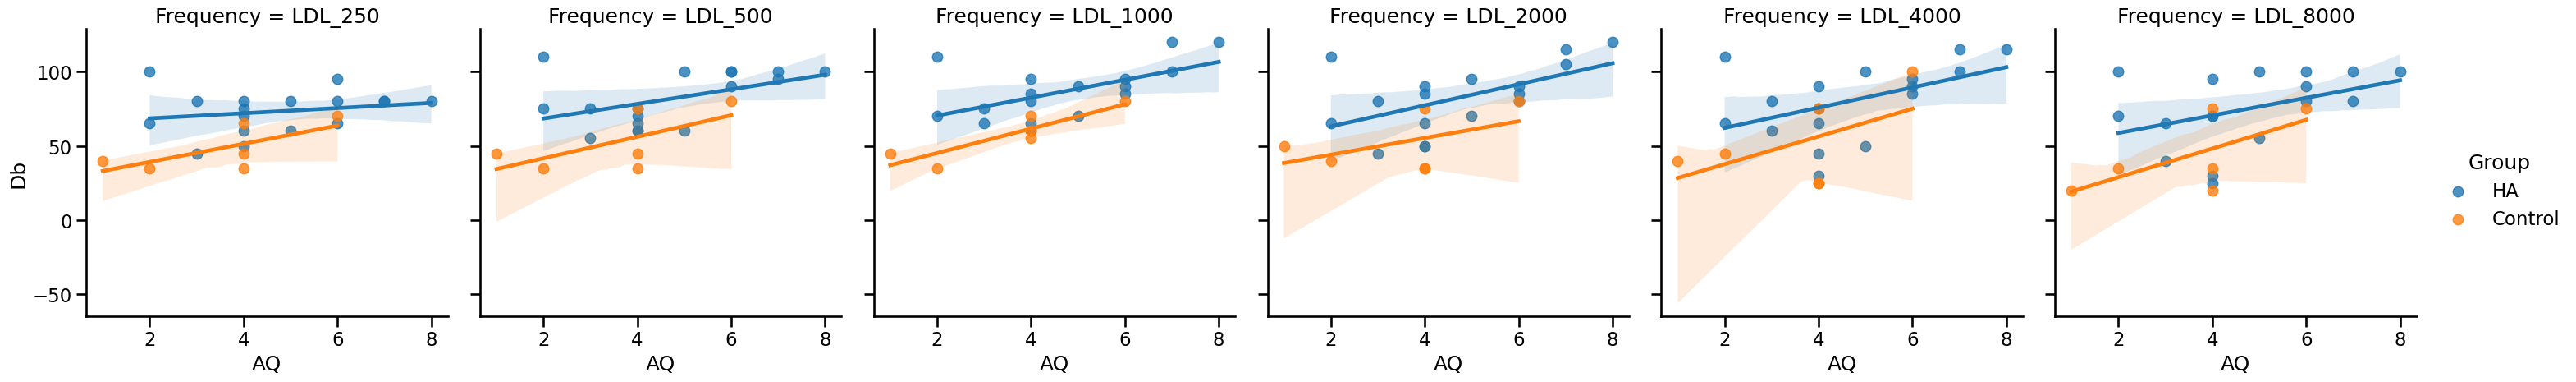

In [95]:
sns.lmplot(x="AQ", y="Db", hue="Group", col="Frequency", data=df_pointplots_ldl)

<Axes: xlabel='ID', ylabel='Db'>

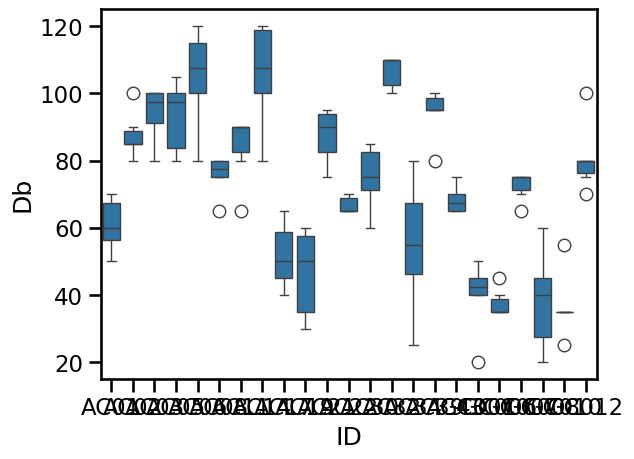

In [96]:
sns.boxplot(x="ID", y="Db", data=df_pointplots_ldl)

<Axes: xlabel='Frequency', ylabel='Db'>

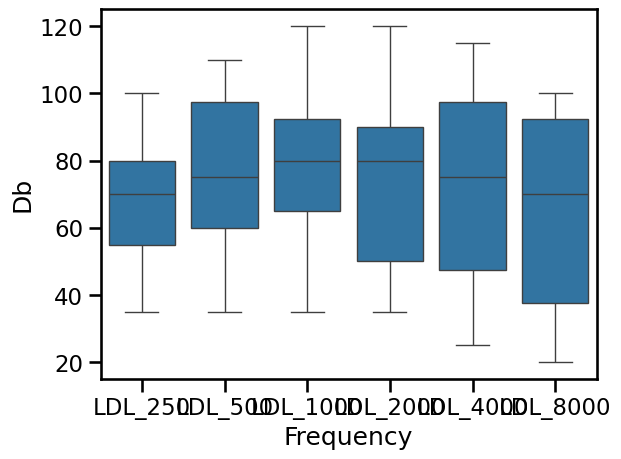

In [97]:
sns.boxplot(x="Frequency", y="Db", data=df_pointplots_ldl)

In [98]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [99]:
%%R
library(lme4) #Requires Matrix==1.6-5
library(jtools)
library(equatiomatic)

In [100]:
%%R -i df_pointplots_ldl

# Maximal random structure
model <- lmer(Db ~ Group + Frequency + AQ + (1 + Group|ID) + (1 + Group|Frequency) + (1 + AQ|ID) + (1 + AQ|Frequency), data=df_pointplots_ldl, REML=FALSE)
null_model <- lmer(Db ~ Frequency + AQ + (1 + Group|ID) + (1 + Group|Frequency) + (1 + AQ|ID) + (1 + AQ|Frequency), data=df_pointplots_ldl, REML=FALSE)
#anova(model,null_model)
summ(model)#, confint = TRUE, conf.method = "profile")

#eq = extract_eq(model, wrap=TRUE, terms_per_line = 2, operator_location = "start")
#eq

/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


MODEL INFO:
Observations: 138
Dependent Variable: Db
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 1092.98, BIC = 1154.45
Pseudo-R² (fixed effects) = 0.51
Pseudo-R² (total) = 0.89 

FIXED EFFECTS:
--------------------------------------------------------------------
                            Est.    S.E.   t val.        d.f.      p
----------------------- -------- ------- -------- ----------- ------
(Intercept)                29.95   16.51     1.81        4.31   0.14
GroupHA                    14.75   11.38     1.30        3.06   0.28
FrequencyLDL_2000          -4.55   12.37    -0.37   450367.86   0.71
FrequencyLDL_250          -12.61   12.37    -1.02   450367.86   0.31
FrequencyLDL_4000          -6.04   12.37    -0.49   450367.86   0.63
FrequencyLDL_500           -5.06   12.37    -0.41   450367.86   0.68
FrequencyLDL_8000         -12.59   12.37    -1.02   450367.86   0.31
AQ                          8.55    2.74     3.12        3.39   0.04
---------------------------------

boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')


In [101]:
%%R -i df_pointplots_ldl

# Maximal random structure
model <- lmer(Db ~ Group + Frequency + AQ + (1 + Group|ID) + (1 + Group|Frequency) + (1 + AQ|ID) + (1 + AQ|Frequency), data=df_pointplots_ldl, REML=FALSE)
null_model <- lmer(Db ~ Frequency + AQ + (1 + Group|ID) + (1 + Group|Frequency) + (1 + AQ|ID) + (1 + AQ|Frequency), data=df_pointplots_ldl, REML=FALSE)
anova(model,null_model)

Data: df_pointplots_ldl
Models:
null_model: Db ~ Frequency + AQ + (1 + Group | ID) + (1 + Group | Frequency) + (1 + AQ | ID) + (1 + AQ | Frequency)
model: Db ~ Group + Frequency + AQ + (1 + Group | ID) + (1 + Group | Frequency) + (1 + AQ | ID) + (1 + AQ | Frequency)
           npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)  
null_model   20 1095.2 1153.7 -527.59   1055.2                       
model        21 1093.0 1154.5 -525.49   1051.0 4.1905  1    0.04065 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')


In [102]:
# Explore based on :
# https://jontalle.web.engr.illinois.edu/MISC/lme4/bw_LME_tutorial.pdf
# - https://mypage.concordia.ca/faculty/pperesne/BIOL_422_680/L17_Slides.pdf
# - https://stats.stackexchange.com/questions/476176/difference-between-repeated-measures-anova-ancova-and-linear-mixed-effects-mode
# - https://stats.stackexchange.com/questions/13166/rs-lmer-cheat-sheet

#### Plots

In [103]:
df_pointplots_ldl.dropna()

,ID,AQ,Profile,Frequency,Db,Group
0,AC01,5.0,HA,LDL_250,60.0,HA
1,AC02,6.0,2e,LDL_250,80.0,HA
2,AC03,5.0,HA,LDL_250,80.0,HA
3,AC05,7.0,2e,LDL_250,80.0,HA
4,AC06,7.0,2e,LDL_250,80.0,HA
...,...,...,...,...,...,...
31,GC006,2.0,TD,LDL_8000,35.0,Control
32,GC007,4.0,TD,LDL_8000,75.0,Control
33,GC008,4.0,TD,LDL_8000,20.0,Control
34,GC010,4.0,TD,LDL_8000,35.0,Control


/tmp/ipykernel_15651/638573422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


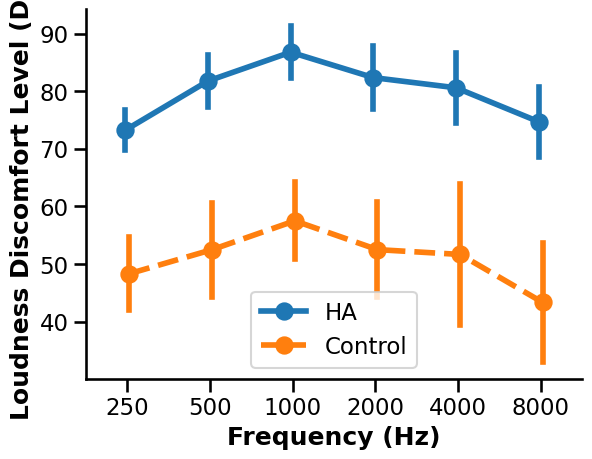

In [104]:
sns.set_context("talk")

fig = sns.pointplot(
    data=df_pointplots_ldl,
    x="Frequency",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/tmp/ipykernel_15651/2715287448.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


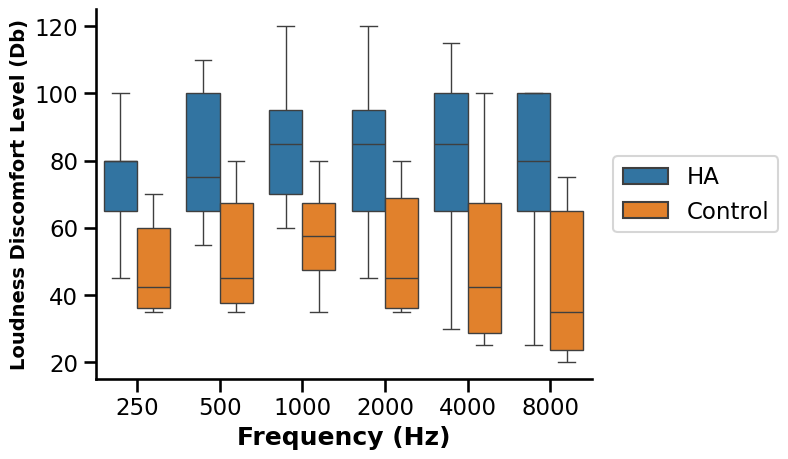

In [136]:
sns.set_context("talk")
fig = sns.boxplot(
    data=df_pointplots_ldl, x="Frequency", y="Db", hue="Group", dodge=True
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "fontsize": 14}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))

plt.show()

/tmp/ipykernel_15651/777354219.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


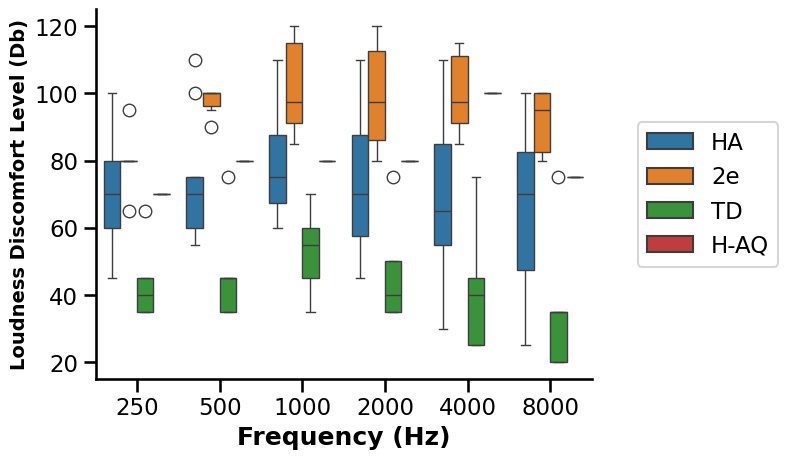

In [ ]:
sns.set_context("talk")
fig = sns.boxplot(
    data=df_pointplots_ldl, x="Frequency", y="Db", hue="Profile", dodge=True
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "fontsize": 14}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))

plt.show()

In [154]:
pg.mixed_anova(
    data=df_pointplots_ldl, dv="Db", between="Profile", within="Frequency", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Profile,41372.101449,3,19,13790.700483,9.07440,0.000615,NaN,0.588951,NaN,NaN,NaN,NaN
1,Frequency,2759.601449,5,95,551.920290,6.90148,0.000016,0.000318,0.266451,0.665449,False,0.305624,0.049448
2,Interaction,1555.625823,15,95,103.708388,1.29682,0.219600,NaN,0.169960,NaN,NaN,NaN,NaN


In [156]:
ldl_posthoc = pg.pairwise_tests(
    data=df_pointplots_ldl,
    dv="Db",
    between="Profile",
    within="Frequency",
    subject="ID",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)
ldl_posthoc

/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/pingouin/parametric.py:257: RuntimeWarning: Degrees of freedom <= 0 for slice
  vx, vy = x.var(ddof=1), y.var(ddof=1)
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1114: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1114: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/pingouin/effsize.py:802: RuntimeWarning: Degrees of freedom <= 0 for slice
  poolsd = np.sqrt(((nx - 1) * x.var(ddof=1) + (ny - 1) * y.v

,Contrast,Frequency,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Frequency,-,LDL_1000,LDL_2000,True,True,2.098094,22.000000,two-sided,0.047602,0.714030,bonferroni,1.373,0.191797
1,Frequency,-,LDL_1000,LDL_250,True,True,5.011512,22.000000,two-sided,0.000051,0.000769,bonferroni,496.859,0.614128
2,Frequency,-,LDL_1000,LDL_4000,True,True,1.997685,22.000000,two-sided,0.058264,0.873955,bonferroni,1.172,0.237427
3,Frequency,-,LDL_1000,LDL_500,True,True,2.205762,22.000000,two-sided,0.038147,0.572211,bonferroni,1.637,0.224552
4,Frequency,-,LDL_1000,LDL_8000,True,True,3.758864,22.000000,two-sided,0.001084,0.016260,bonferroni,33.015,0.496691
5,Frequency,-,LDL_2000,LDL_250,True,True,2.752257,22.000000,two-sided,0.011627,0.174406,bonferroni,4.326,0.353415
6,Frequency,-,LDL_2000,LDL_4000,True,True,0.743138,22.000000,two-sided,0.465261,1.000000,bonferroni,0.281,0.055921
7,Frequency,-,LDL_2000,LDL_500,True,True,0.173009,22.000000,two-sided,0.864227,1.000000,bonferroni,0.222,0.018068
8,Frequency,-,LDL_2000,LDL_8000,True,True,3.108954,22.000000,two-sided,0.005117,0.076753,bonferroni,8.645,0.298179
9,Frequency,-,LDL_250,LDL_4000,True,True,-1.868407,22.000000,two-sided,0.075081,1.000000,bonferroni,0.964,-0.261531


### Hearing Level (HL) between groups

#### Preprocessing
dataset must be in melt form

In [29]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,AQ_TOTAL,Profile
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0,5.0,HA
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0,6.0,2e
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0,5.0,HA
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,7.0,2e
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0,7.0,2e


In [138]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["Group"] == "HA"]
df_pointplots_control = df_pointplots[df_pointplots["Group"] == "Control"]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante", "AQ_TOTAL", "Profile"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante", "AQ_TOTAL", "Profile"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_control["Group"] = "Control"

# Concat
df_pointplots_hl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_hl

,Código de participante,AQ_TOTAL,Profile,variable,value,Group
0,AC01,5.0,HA,HL_250,10.0,HA
1,AC02,6.0,2e,HL_250,10.0,HA
2,AC03,5.0,HA,HL_250,10.0,HA
3,AC05,7.0,2e,HL_250,5.0,HA
4,AC06,7.0,2e,HL_250,5.0,HA
...,...,...,...,...,...,...
31,GC006,2.0,TD,HL_8000,15.0,Control
32,GC007,4.0,TD,HL_8000,0.0,Control
33,GC008,4.0,TD,HL_8000,5.0,Control
34,GC010,4.0,TD,HL_8000,0.0,Control


In [139]:
df_pointplots_hl.columns = ["ID", "AQ", "Profile", "Frequency", "Db", "Group"]
df_pointplots_hl

,ID,AQ,Profile,Frequency,Db,Group
0,AC01,5.0,HA,HL_250,10.0,HA
1,AC02,6.0,2e,HL_250,10.0,HA
2,AC03,5.0,HA,HL_250,10.0,HA
3,AC05,7.0,2e,HL_250,5.0,HA
4,AC06,7.0,2e,HL_250,5.0,HA
...,...,...,...,...,...,...
31,GC006,2.0,TD,HL_8000,15.0,Control
32,GC007,4.0,TD,HL_8000,0.0,Control
33,GC008,4.0,TD,HL_8000,5.0,Control
34,GC010,4.0,TD,HL_8000,0.0,Control


In [140]:
pg.mixed_anova(
    data=df_pointplots_hl, dv="Db", between="Group", within="Frequency", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,178.475774,1,21,178.475774,1.027111,0.322373,NaN,0.046629,NaN,NaN,NaN,NaN
1,Frequency,207.971014,5,105,41.594203,1.876700,0.104587,0.136112,0.082035,0.59952,False,0.145158,0.000425
2,Interaction,64.863953,5,105,12.972791,0.585323,0.711164,NaN,0.027117,NaN,NaN,NaN,NaN


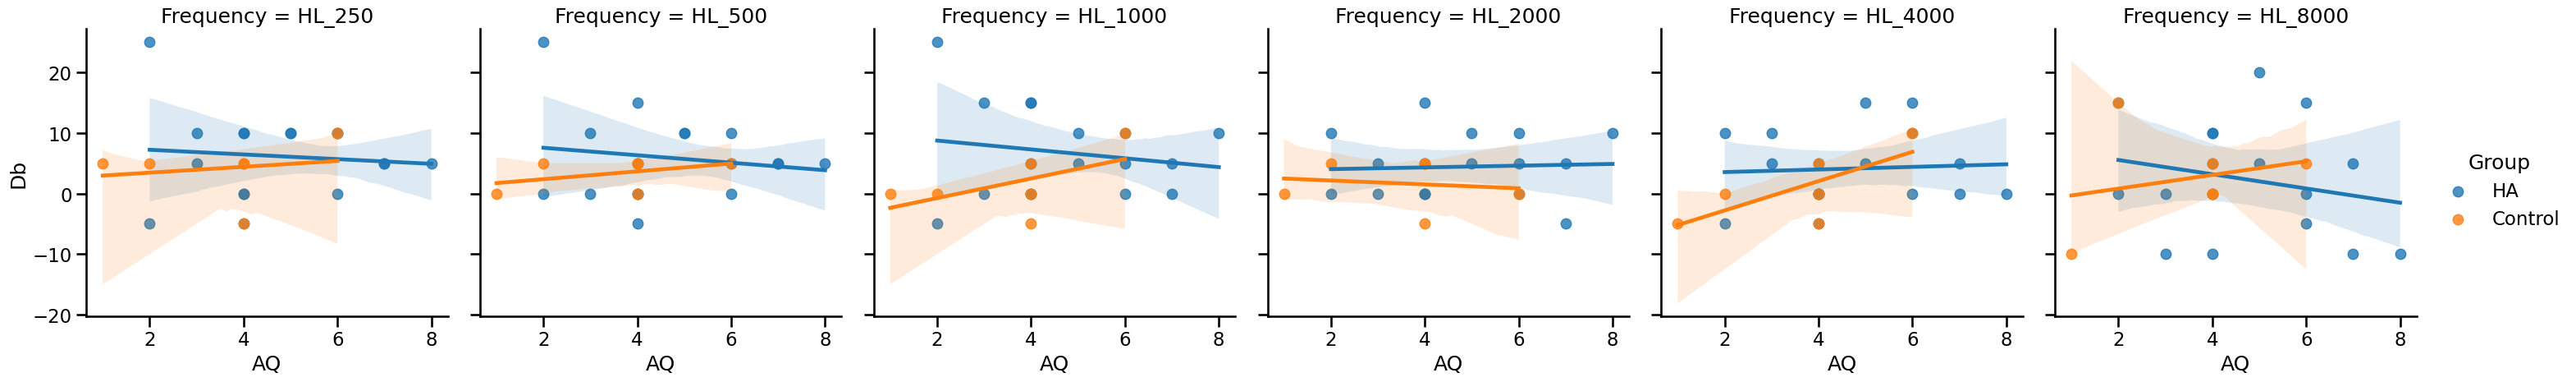

In [141]:
sns.lmplot(x="AQ", y="Db", hue="Group", col="Frequency", data=df_pointplots_hl)

In [142]:
%%R -i df_pointplots_hl

# Maximal random structure
model <- lmer(Db ~ Group + Frequency + AQ + (1 + Group|ID) + (1 + Group|Frequency) + (1 + AQ|ID) + (1 + AQ|Frequency), data=df_pointplots_hl, REML=FALSE)
null_model <- lmer(Db ~ Frequency + AQ + (1 + Group|ID) + (1 + Group|Frequency) + (1 + AQ|ID) + (1 + AQ|Frequency), data=df_pointplots_hl, REML=FALSE)
#anova(model,null_model)
summ(model, confint = TRUE)

/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


MODEL INFO:
Observations: 138
Dependent Variable: Db
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 895.33, BIC = 956.81
Pseudo-R² (fixed effects) = 0.05
Pseudo-R² (total) = 0.42 

FIXED EFFECTS:
---------------------------------------------------------------------------
                          Est.    2.5%   97.5%   t val.         d.f.      p
---------------------- ------- ------- ------- -------- ------------ ------
(Intercept)               4.38   -1.85   10.62     0.47        10.07   0.65
GroupHA                   1.09   -2.91    5.10     0.33         7.11   0.75
FrequencyHL_2000         -1.74   -4.37    0.89    -0.15   2336697.87   0.88
FrequencyHL_250           0.22   -2.42    2.85     0.02   2336697.87   0.99
FrequencyHL_4000         -2.17   -4.81    0.46    -0.18   2336697.87   0.85
FrequencyHL_500          -0.22   -2.85    2.42    -0.02   2336697.87   0.99
FrequencyHL_8000         -3.04   -5.68   -0.41    -0.26   2336697.87   0.80
AQ                        0.08   -

boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')


#### Plots

/tmp/ipykernel_15651/504455651.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


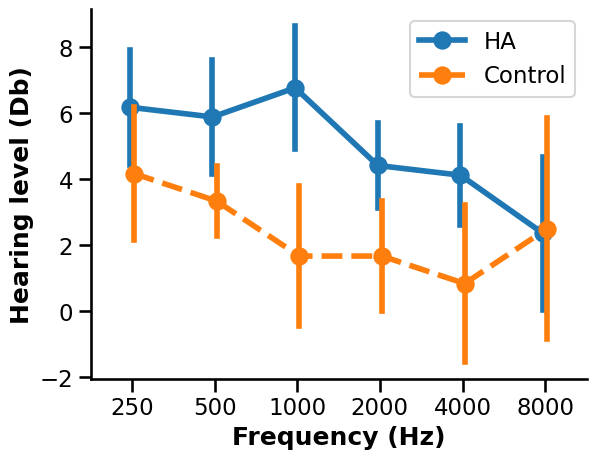

In [143]:
sns.set_context("talk")

fig = sns.pointplot(
    data=df_pointplots_hl,
    x="Frequency",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
# plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
# plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000'])
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})
fig.set_ylabel("Hearing level (Db)", fontdict={"weight": "bold"})
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/tmp/ipykernel_15651/449596729.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


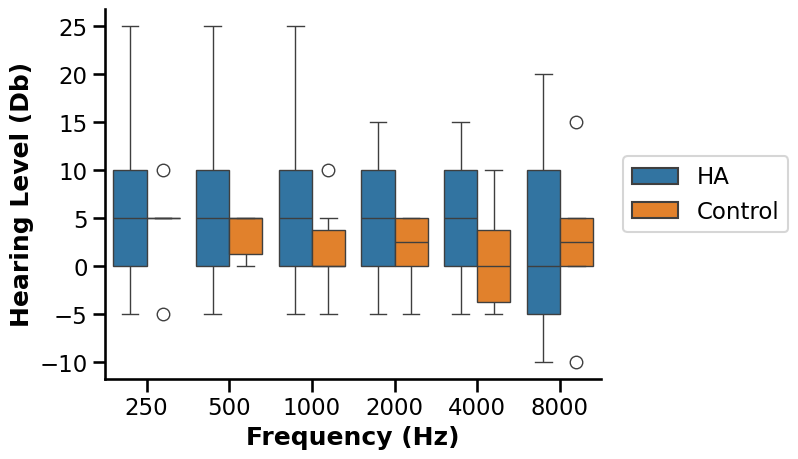

In [146]:
sns.set_context("talk")
fig = sns.boxplot(data=df_pointplots_hl, x="Frequency", y="Db", hue="Group")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Hearing Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))

plt.show()

/tmp/ipykernel_15651/3101771864.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


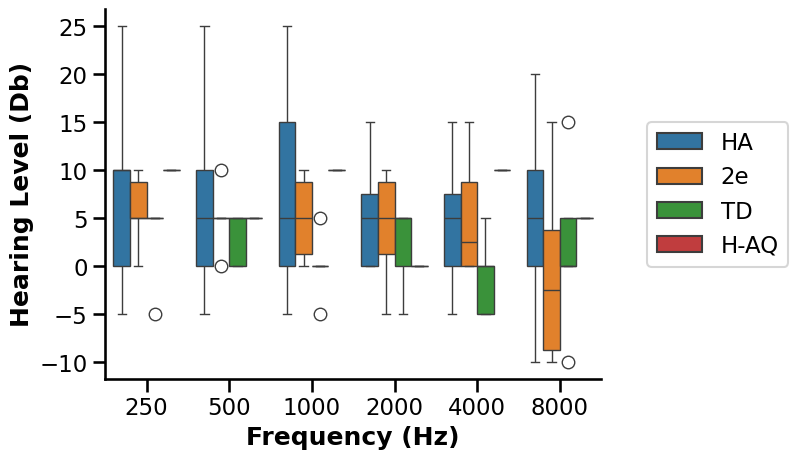

In [145]:
sns.set_context("talk")
fig = sns.boxplot(
    data=df_pointplots_hl, x="Frequency", y="Db", hue="Profile", dodge=True
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Hearing Level (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))

plt.show()

## Comparing means of OPI and TWI between HA and control
- T-test OPI per group
- OPI per group (boxplot)
- T-test TWI per group
- TWI per group (boxplot)

In [37]:
df = pd.read_pickle("data/df")

In [38]:
pg.pairwise_tests(
    data=df,
    dv="OPI",
    between="Group",
    effsize="cohen",
    correction=True,
    parametric=True,
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,Group,Control,HA,False,True,0.167976,7.776482,two-sided,0.870888,0.396,0.091612


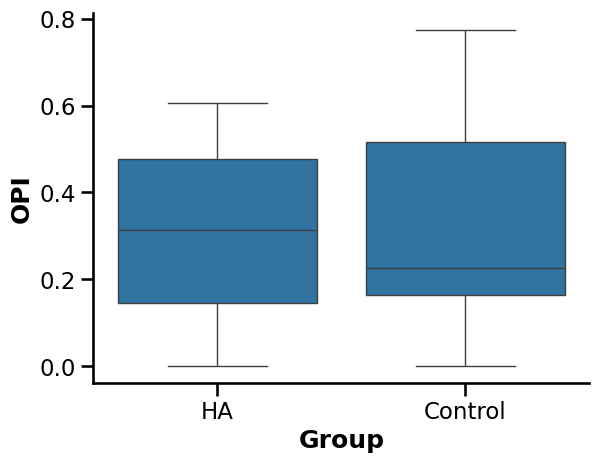

In [39]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="Group", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

In [151]:
pg.pairwise_tests(
    data=df,
    dv="OPI",
    between="Profile",
    effsize="cohen",
    correction=True,
    parametric=True,
)

/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/pingouin/parametric.py:257: RuntimeWarning: Degrees of freedom <= 0 for slice
  vx, vy = x.var(ddof=1), y.var(ddof=1)
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1114: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1114: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/pingouin/effsize.py:802: RuntimeWarning: Degrees of freedom <= 0 for slice
  poolsd = np.sqrt(((nx - 1) * x.var(ddof=1) + (ny - 1) * y.v

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,Profile,2e,H-AQ,False,True,0.282359,5.000000,two-sided,0.788983,0.386,0.115273
1,Profile,2e,HA,False,True,-1.080807,8.473007,two-sided,0.309584,0.634,-0.590603
2,Profile,2e,TD,False,True,-1.137905,6.922069,two-sided,0.293008,0.71,-0.714407
3,Profile,H-AQ,HA,False,True,NaN,1.000000,two-sided,NaN,nan,NaN
4,Profile,H-AQ,TD,False,True,NaN,1.000000,two-sided,NaN,nan,NaN
5,Profile,HA,TD,False,True,-0.523977,5.105670,two-sided,0.622238,0.491,-0.354286


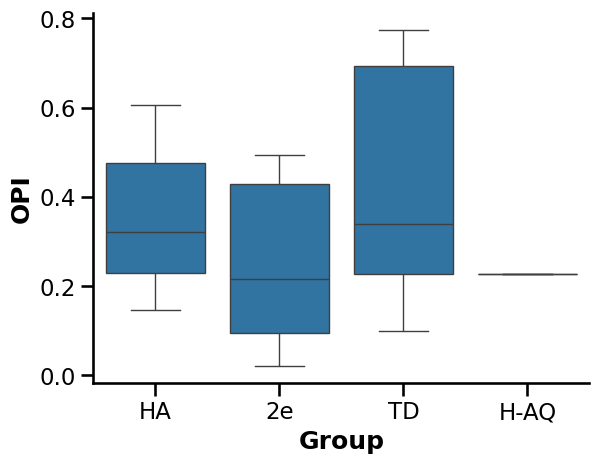

In [148]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="Profile", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

In [40]:
pg.pairwise_tests(
    data=df,
    dv="TWI",
    between="Group",
    effsize="cohen",
    correction=True,
    parametric=True,
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,Group,Control,HA,False,True,-0.164524,7.156306,two-sided,0.87387,0.414,-0.086769


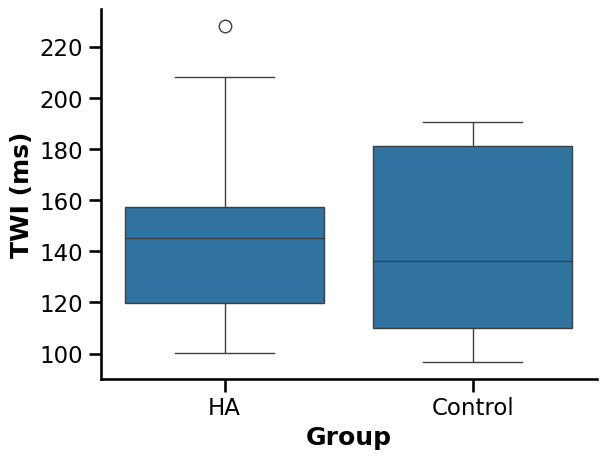

In [41]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="Group", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

In [152]:
pg.pairwise_tests(
    data=df,
    dv="TWI",
    between="Profile",
    effsize="cohen",
    correction=True,
    parametric=True,
)

/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/pingouin/parametric.py:257: RuntimeWarning: Degrees of freedom <= 0 for slice
  vx, vy = x.var(ddof=1), y.var(ddof=1)
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1114: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1114: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/renato/.virtualenvs/gifted/lib/python3.10/site-packages/pingouin/effsize.py:802: RuntimeWarning: Degrees of freedom <= 0 for slice
  poolsd = np.sqrt(((nx - 1) * x.var(ddof=1) + (ny - 1) * y.v

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,Profile,2e,H-AQ,False,True,2.462614,5.000000,two-sided,0.057045,1.898,1.005358
1,Profile,2e,HA,False,True,0.539454,7.665004,two-sided,0.604885,0.476,0.306581
2,Profile,2e,TD,False,True,0.092023,8.804964,two-sided,0.928739,0.482,0.055418
3,Profile,H-AQ,HA,False,True,NaN,1.000000,two-sided,NaN,nan,NaN
4,Profile,H-AQ,TD,False,True,NaN,1.000000,two-sided,NaN,nan,NaN
5,Profile,HA,TD,False,True,-0.409028,6.014668,two-sided,0.696685,0.474,-0.250126


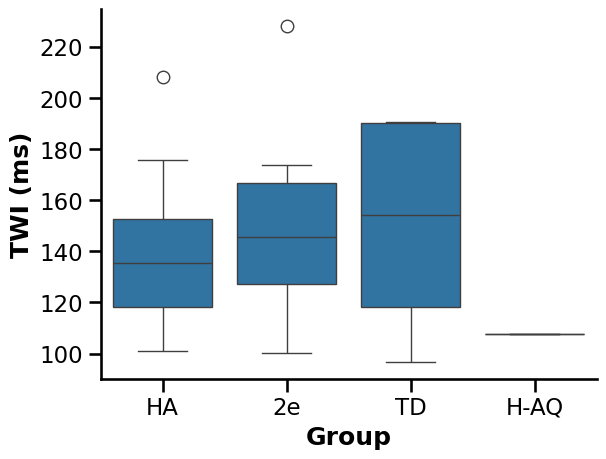

In [149]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="Profile", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

## Compare differences between AQ scoring between experimental and control
No significant differences

In [42]:
df_HA = df[df["Group"] == "HA"]
df_Control = df[df["Group"] == "Control"]


print("t test for AQ score")
display(pg.ttest(df_HA["AQ_TOTAL"], df_Control["AQ_TOTAL"]))

t test for AQ score


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.473372,8.705946,two-sided,0.175863,"[-0.62, 2.91]",0.693059,0.827,0.344834


## Group Sigmoid plot

### Preprocessing

In [43]:
df_sigmoid_fitted = pd.read_pickle("data/df_group_sigmoid_ha")

soas = [
    34.0,
    51.0,
    68.0,
    85.0,
    102.0,
    119.0,
    136.0,
    153.0,
    170.0,
    187.0,
    204.0,
    221.0,
    238.0,
    255.0,
    272.0,
]  # inter beep delay in experiment

In [44]:
# Generate the data for the plotsusing the fitted parameters
x = np.linspace(soas[0], soas[-1], 100)

index_of_control_group = 0
control = df_sigmoid_fitted.iloc[index_of_control_group].tolist()[1:-1]

index_of_HA_group = 1
ha = df_sigmoid_fitted.iloc[index_of_HA_group].tolist()[1:-1]

y_control = sig(x, *control)
y_ha = sig(x, *ha)

# Create a pandas DataFrame
df_control = pd.DataFrame({"x": x, "y": y_control})
df_ha = pd.DataFrame({"x": x, "y": y_ha})

### Plot

In [45]:
ha_data = (
    df_sigmoid.query("Condition == 'HA'").groupby("SOA")["Illusion_count"].mean().values
    * 10
)
ha_data_sem = (
    df_sigmoid.query("Condition  == 'HA'").groupby("SOA")["Illusion_count"].sem().values
    * 10
)

control_data = (
    df_sigmoid.query("Condition == 'Control'")
    .groupby("SOA")["Illusion_count"]
    .mean()
    .values
    * 10
)
control_data_sem = (
    df_sigmoid.query("Condition == 'Control'")
    .groupby("SOA")["Illusion_count"]
    .sem()
    .values
    * 10
)

In [46]:
pg.mixed_anova(
    data=df_sigmoid,
    dv="Illusion_count",
    within="SOA",
    between="Condition",
    subject="Participant",
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Condition,3.052134,1,25,3.052134,0.043518,8.364430e-01,NaN,0.001738,NaN,NaN,NaN,NaN
1,SOA,1249.219753,14,350,89.229982,31.967918,3.653870e-54,1.188901e-17,0.561157,0.290018,False,0.000005,2.738634e-14
2,Interaction,33.981199,14,350,2.427229,0.869589,5.925639e-01,NaN,0.033614,NaN,NaN,NaN,NaN


In [47]:
dfi_posthoc = pg.pairwise_tests(
    data=df_sigmoid,
    dv="Illusion_count",
    between="Condition",
    within="SOA",
    subject="Participant",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)

dfi_posthoc

,Contrast,SOA,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,SOA,-,2.0,3.0,True,True,-2.655343,26.000000,two-sided,0.013349,1.000000,bonferroni,3.658,-0.278602
1,SOA,-,2.0,4.0,True,True,-4.248839,26.000000,two-sided,0.000244,0.025589,bonferroni,119.16,-0.558212
2,SOA,-,2.0,5.0,True,True,-3.696786,26.000000,two-sided,0.001026,0.107688,bonferroni,33.31,-0.477622
3,SOA,-,2.0,6.0,True,True,-2.210225,26.000000,two-sided,0.036095,1.000000,bonferroni,1.615,-0.388247
4,SOA,-,2.0,7.0,True,True,-0.204782,26.000000,two-sided,0.839337,1.000000,bonferroni,0.208,-0.034716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,SOA * Condition,12.0,Control,HA,False,True,0.396556,7.762966,two-sided,0.702372,1.000000,bonferroni,0.415,0.216627
117,SOA * Condition,13.0,Control,HA,False,True,-0.218643,12.990189,two-sided,0.830326,1.000000,bonferroni,0.399,-0.086405
118,SOA * Condition,14.0,Control,HA,False,True,0.447444,7.562998,two-sided,0.667091,1.000000,bonferroni,0.421,0.250612
119,SOA * Condition,15.0,Control,HA,False,True,1.656850,6.915872,two-sided,0.142040,1.000000,bonferroni,1.01,1.023987


In [48]:
sup_table_1 = dfi_posthoc.query("Contrast == 'SOA * Condition'")[
    ["Contrast", "SOA", "A", "B", "T", "dof", "p-unc", "cohen"]
]
pg.print_table(sup_table_1, tablefmt="latex")


POST HOC TESTS

\begin{tabular}{lrllrrrr}
\hline
 Contrast        &    SOA & A       & B   &      T &    dof &   p-unc &   cohen \\
\hline
 SOA * Condition &  2.000 & Control & HA  & -0.190 &  8.745 &   0.854 &  -0.094 \\
 SOA * Condition &  3.000 & Control & HA  &  0.504 &  8.858 &   0.626 &   0.247 \\
 SOA * Condition &  4.000 & Control & HA  & -0.385 &  9.198 &   0.709 &  -0.184 \\
 SOA * Condition &  5.000 & Control & HA  & -0.523 &  9.579 &   0.613 &  -0.243 \\
 SOA * Condition &  6.000 & Control & HA  & -0.254 &  8.699 &   0.805 &  -0.126 \\
 SOA * Condition &  7.000 & Control & HA  & -0.038 &  8.432 &   0.971 &  -0.019 \\
 SOA * Condition &  8.000 & Control & HA  &  0.004 &  8.322 &   0.997 &   0.002 \\
 SOA * Condition &  9.000 & Control & HA  & -0.134 &  9.010 &   0.896 &  -0.065 \\
 SOA * Condition & 10.000 & Control & HA  &  1.074 &  6.812 &   0.320 &   0.676 \\
 SOA * Condition & 11.000 & Control & HA  &  0.473 &  8.137 &   0.649 &   0.248 \\
 SOA * Condition & 12.000 & Co

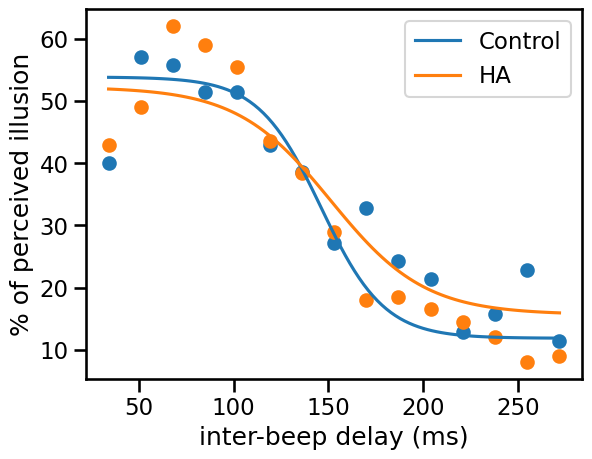

In [49]:
# Plot the sigmoid function
fig = sns.lineplot(data=df_control, x="x", y="y", label="Control")
fig = plt.scatter(soas, control_data)
fig = sns.lineplot(data=df_ha, x="x", y="y", label="HA")
fig = plt.scatter(soas, ha_data)

plt.xlabel("inter-beep delay (ms)")
plt.ylabel("% of perceived illusion")
plt.legend()
plt.show()

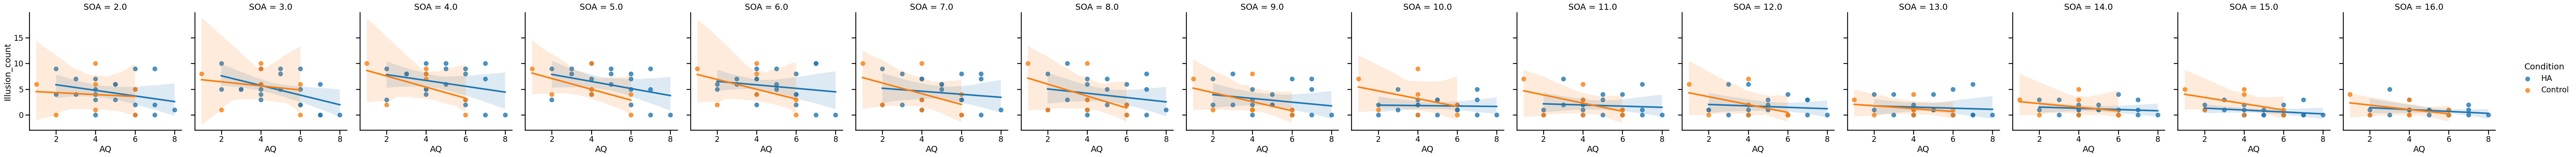

In [50]:
sns.lmplot(x="AQ", y="Illusion_count", hue="Condition", col="SOA", data=df_sigmoid)

In [51]:
%%R -i df_sigmoid

# Maximal random structure
model <- lmer(Illusion_count ~ Condition + SOA + AQ + (1 + Condition|Participant) + (1 + Condition|SOA) + (1 + AQ|Participant) + (1 + AQ|SOA), data=df_sigmoid, REML=FALSE)
null_model <- lmer(Illusion_count ~ SOA + AQ + (1 + Condition|Participant) + (1 + Condition|SOA) + (1 + AQ|Participant) + (1 + AQ|SOA), data=df_sigmoid, REML=FALSE)
#anova(model,null_model)
summ(model, confint = TRUE)

If summ is taking too long to run, try setting pvals = FALSE, t.df = 's' if
you have the lmerTest package, or t.df = 'residual' (or some number).
MODEL INFO:
Observations: 405
Dependent Variable: Illusion_count
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 1694.74, BIC = 1762.80
Pseudo-R² (fixed effects) = 0.35
Pseudo-R² (total) = 0.57 

FIXED EFFECTS:
-----------------------------------------------------------------
                     Est.    2.5%   97.5%   t val.    d.f.      p
----------------- ------- ------- ------- -------- ------- ------
(Intercept)          7.59    4.81   10.37     4.51   21.19   0.00
ConditionHA          0.18   -1.85    2.20     0.15   10.54   0.89
SOA                 -0.31   -0.39   -0.24    -6.80   15.21   0.00
AQ                  -0.35   -0.82    0.11    -1.21   17.70   0.24
-----------------------------------------------------------------

p values calculated using Kenward-Roger standard errors and d.f.

RANDOM EFFECTS:
-----------------------

boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
boundary (singular) fit: see help('isSingular')
